# Cherry Classifier Training on Google Colab

This notebook runs the ResNet50 cherry pit classifier training on Google Colab Pro with GPU acceleration.

## Prerequisites
- Google Colab Pro subscription (for GPU access)
- Google Drive (for saving model checkpoints)

## Steps
1. **Setup**: Install dependencies and clone repos
2. **Configure**: Mount Google Drive for checkpoint saving
3. **Train**: Run training script
4. **Monitor**: View training progress
5. **Download**: Save trained model to Drive

## Step 1: Check GPU Availability

In [19]:
# Check if GPU is available
!nvidia-smi

import torch
print(f"\nPyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU device: {torch.cuda.get_device_name(0)}")

Fri Jan 30 01:39:13 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P0             50W /  400W |       5MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

## Step 2: Mount Google Drive

In [20]:
# Mount Google Drive for saving checkpoints
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Create output directory in Drive
import os
drive_output_dir = '/content/drive/MyDrive/cherry_training/outputs'
os.makedirs(drive_output_dir, exist_ok=True)
print(f"\nOutput directory: {drive_output_dir}")

Mounted at /content/drive

Output directory: /content/drive/MyDrive/cherry_training/outputs


## Step 3: Install Dependencies

In [21]:
# Install required packages
!pip install -q pyyaml scikit-learn matplotlib

print("\nDependencies installed successfully!")


Dependencies installed successfully!


## Step 4: Clone Repositories

In [22]:
# Clone training code repository
!git clone https://github.com/usefulmove/cherries.git

# Clone dataset repository (shallow clone to save time)
!git clone --depth 1 https://github.com/weshavener/cherry_classification.git

print("\nRepositories cloned successfully!")

fatal: destination path 'cherries' already exists and is not an empty directory.
fatal: destination path 'cherry_classification' already exists and is not an empty directory.

Repositories cloned successfully!


## Step 5: Verify Dataset

In [23]:
# Check dataset structure and count images
import os
from pathlib import Path

data_root = Path('/content/cherry_classification/data')

train_clean = data_root / 'train' / 'cherry_clean'
train_pit = data_root / 'train' / 'cherry_pit'
val_clean = data_root / 'val' / 'cherry_clean'
val_pit = data_root / 'val' / 'cherry_pit'

print("Dataset Summary:")
print("=" * 50)
print(f"Training clean images: {len(list(train_clean.glob('*')))}")
print(f"Training pit images: {len(list(train_pit.glob('*')))}")
print(f"Validation clean images: {len(list(val_clean.glob('*')))}")
print(f"Validation pit images: {len(list(val_pit.glob('*')))}")
print("=" * 50)

Dataset Summary:
Training clean images: 1978
Training pit images: 1698
Validation clean images: 660
Validation pit images: 566


## Step 6: Run Training

**Note**: This will take 1-2 hours to complete 30 epochs on Colab Pro GPU.

In [29]:
!pwd
!ls -lah

/content/cherries
total 44K
drwxr-xr-x 7 root root 4.0K Jan 30 01:33 .
drwxr-xr-x 1 root root 4.0K Jan 30 01:39 ..
-rw-r--r-- 1 root root 8.2K Jan 30 01:26 AGENTS.md
drwxr-xr-x 6 root root 4.0K Jan 30 01:33 cherries
drwxr-xr-x 5 root root 4.0K Jan 30 01:33 cherry_classification
drwxr-xr-x 2 root root 4.0K Jan 30 01:26 cherry_system
drwxr-xr-x 6 root root 4.0K Jan 30 01:26 docs
drwxr-xr-x 8 root root 4.0K Jan 30 01:26 .git
-rw-r--r-- 1 root root  471 Jan 30 01:26 .gitignore


In [31]:
# Change to training directory
%cd /content/cherries

# Run training script
!python cherries/training/scripts/train.py \
    --config cherries/training/configs/resnet50_baseline.yaml \
    --data-root /content/cherry_classification/data \
    --output-dir {drive_output_dir}/resnet50_baseline

/content/cherries

Loading config from: cherries/training/configs/resnet50_baseline.yaml
Output directory: /content/drive/MyDrive/cherry_training/outputs/resnet50_baseline
Config saved to: /content/drive/MyDrive/cherry_training/outputs/resnet50_baseline/config.yaml
Using device: cuda

LOADING DATA

Dataset loaded from: /content/cherry_classification/data
Training samples: 3676
Validation samples: 1226
Classes: ['cherry_clean', 'cherry_pit']
Class distribution (train): {'cherry_clean': 1978, 'cherry_pit': 1698}
Class distribution (val): {'cherry_clean': 660, 'cherry_pit': 566}

Class names: ['cherry_clean', 'cherry_pit']

CREATING MODEL
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100% 97.8M/97.8M [00:00<00:00, 130MB/s]
Loaded ResNet50 with ImageNet pretrained weights
Replaced final layer: Linear(2048, 2)
Model moved to device: cuda
Optimizer: adam
Learning rate: 0.0001
Weight decay: 1e-05

STARTING 

## Step 7: Plot Training Curves

Loading metrics from: /content/drive/MyDrive/cherry_training/outputs/resnet50_baseline/metrics.json

TRAINING SUMMARY
Total epochs: 30

Best validation accuracy: 0.9258 (epoch 11)
Final validation accuracy: 0.9225
Final validation loss: 0.3766
Improvement from epoch 1: +0.0131

Plot saved to: /content/drive/MyDrive/cherry_training/outputs/resnet50_baseline/training_curves.png


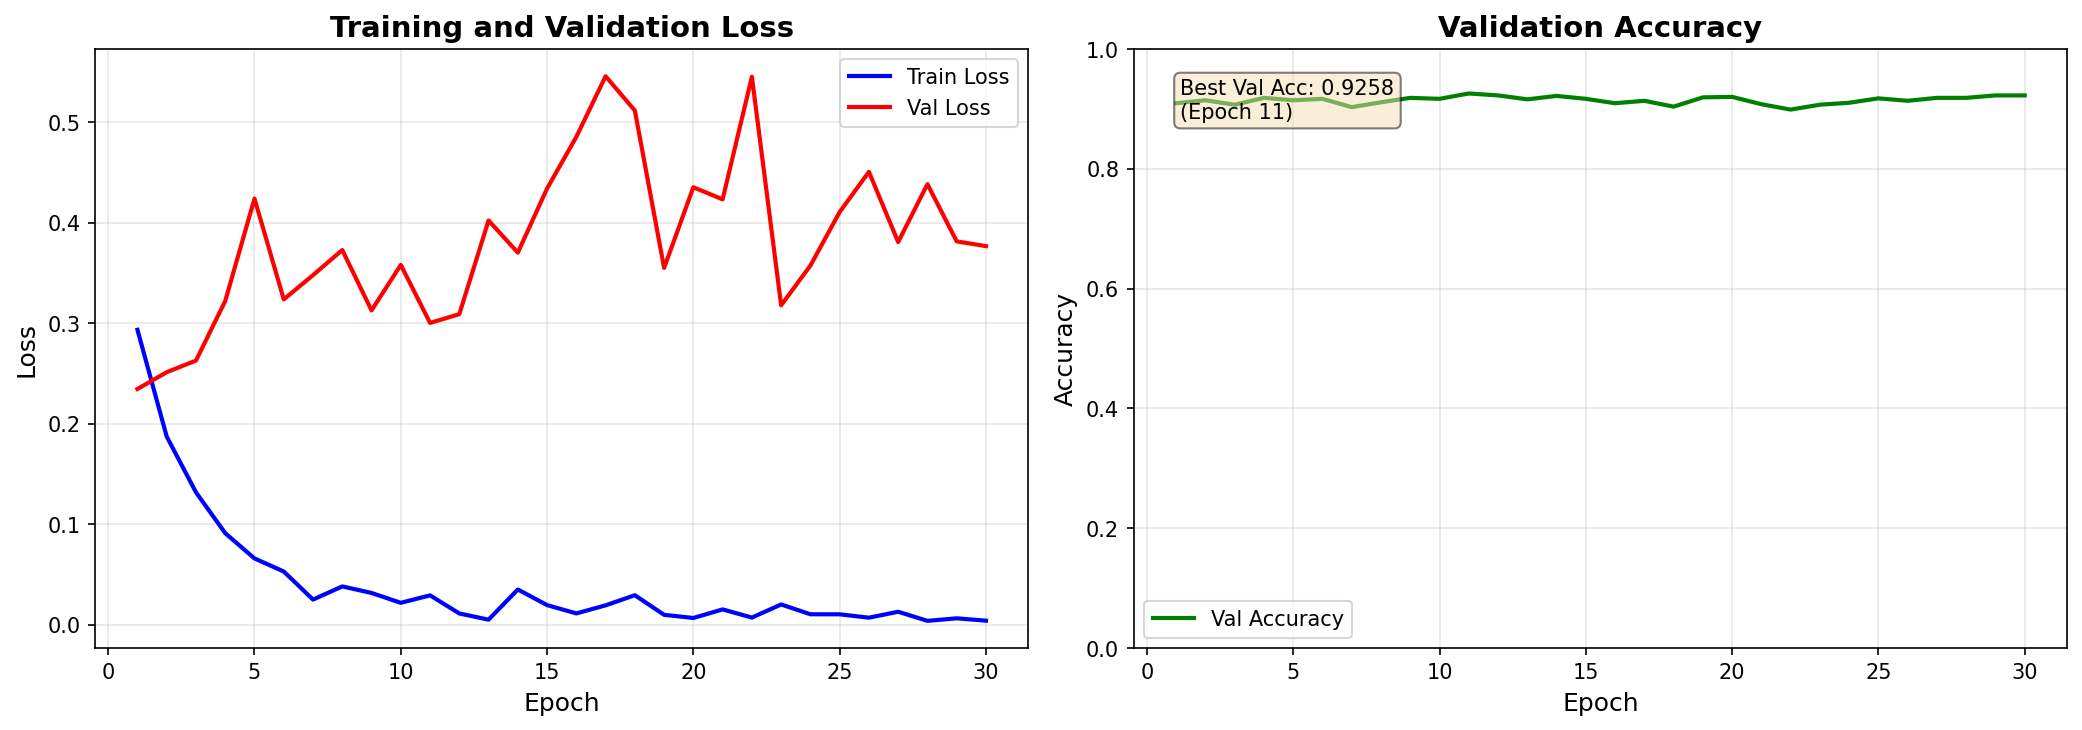

In [33]:
# Generate training curves
!python cherries/training/scripts/plot_metrics.py \
    {drive_output_dir}/resnet50_baseline/metrics.json \
    --output {drive_output_dir}/resnet50_baseline/training_curves.png

# Display the plot
from IPython.display import Image, display
display(Image(f'{drive_output_dir}/resnet50_baseline/training_curves.png'))

## Step 8: View Training Summary

In [34]:
# Read and display final metrics
import json

metrics_file = f'{drive_output_dir}/resnet50_baseline/metrics.json'

# Read all metrics
val_metrics = []
with open(metrics_file, 'r') as f:
    for line in f:
        data = json.loads(line)
        if data.get('phase') == 'val':
            val_metrics.append(data)

# Print summary
if val_metrics:
    final = val_metrics[-1]
    best_acc = max([m['val_accuracy'] for m in val_metrics])
    best_epoch = [m for m in val_metrics if m['val_accuracy'] == best_acc][0]['epoch']

    print("\n" + "="*50)
    print("TRAINING COMPLETE!")
    print("="*50)
    print(f"Final Validation Accuracy: {final['val_accuracy']:.4f}")
    print(f"Final Validation Loss: {final['val_loss']:.4f}")
    print(f"\nBest Validation Accuracy: {best_acc:.4f} (Epoch {best_epoch})")
    print("\nPer-Class Metrics:")
    for class_name, metrics in final['val_per_class_metrics'].items():
        print(f"  {class_name}:")
        print(f"    Precision: {metrics['precision']:.4f}")
        print(f"    Recall: {metrics['recall']:.4f}")
        print(f"    F1: {metrics['f1']:.4f}")
    print("="*50)
else:
    print("No validation metrics found!")


TRAINING COMPLETE!
Final Validation Accuracy: 0.9225
Final Validation Loss: 0.3766

Best Validation Accuracy: 0.9258 (Epoch 11)

Per-Class Metrics:
  cherry_clean:
    Precision: 0.9088
    Recall: 0.9515
    F1: 0.9297
  cherry_pit:
    Precision: 0.9402
    Recall: 0.8887
    F1: 0.9137


## Step 9: List Output Files

In [35]:
# List all files in output directory
!ls -lh {drive_output_dir}/resnet50_baseline/

print("\n" + "="*50)
print("Output files saved to Google Drive:")
print(f"{drive_output_dir}/resnet50_baseline/")
print("\nKey files:")
print("  - model_best.pt: Best model (highest val accuracy)")
print("  - model_final.pt: Final model (last epoch)")
print("  - metrics.json: Training metrics log")
print("  - training_curves.png: Training visualization")
print("  - checkpoint_epoch_*.pt: Periodic checkpoints")
print("="*50)

total 1.8G
-rw------- 1 root root 270M Jan 30 01:43 checkpoint_epoch_10.pt
-rw------- 1 root root 270M Jan 30 01:44 checkpoint_epoch_15.pt
-rw------- 1 root root 270M Jan 30 01:44 checkpoint_epoch_20.pt
-rw------- 1 root root 270M Jan 30 01:44 checkpoint_epoch_25.pt
-rw------- 1 root root 270M Jan 30 01:45 checkpoint_epoch_30.pt
-rw------- 1 root root 270M Jan 30 01:43 checkpoint_epoch_5.pt
-rw------- 1 root root  753 Jan 30 01:42 config.yaml
-rw------- 1 root root  22K Jan 30 01:45 metrics.json
-rw------- 1 root root  90M Jan 30 01:43 model_best.pt
-rw------- 1 root root  90M Jan 30 01:45 model_final.pt
-rw------- 1 root root  99K Jan 30 01:46 training_curves.png

Output files saved to Google Drive:
/content/drive/MyDrive/cherry_training/outputs/resnet50_baseline/

Key files:
  - model_best.pt: Best model (highest val accuracy)
  - model_final.pt: Final model (last epoch)
  - metrics.json: Training metrics log
  - training_curves.png: Training visualization
  - checkpoint_epoch_*.pt: 

## Optional: Download Model to Local Machine

The models are already saved to your Google Drive, but you can also download them directly from Colab:

In [ ]:
# Download best model
from google.colab import files

# Uncomment to download:
# files.download(f'{drive_output_dir}/resnet50_baseline/model_best.pt')
# files.download(f'{drive_output_dir}/resnet50_baseline/training_curves.png')

print("To download files, uncomment the lines above and run this cell.")